In [4]:
## Developing the DBN model
## The MNIST database, contains hand-drawn digiits from 0-9.
#pip install tensorflow-dataset

In [11]:
## Import our dependencies
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
from functools import partial

import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

In [12]:
## Download the MNIST data locally from Google Cloud Storage (GCS)
mnist_builder = tfds.builder("mnist")
mnist_builder.download_and_prepare()

In [13]:
## Data comes pre-seperated into training and test sets
info = mnist_builder.info
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/home/jovyan/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


Label: 4


2024-05-15 04:01:00.701461: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


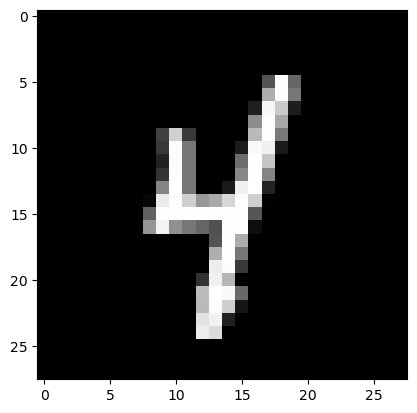

In [14]:
def flatten_image(x, label=False):
    if label:  
        return (tf.divide(tf.dtypes.cast(tf.reshape(x["image"], (1,28*28)), tf.float32), 256.0) , x["label"])
    else:
        return (tf.divide(tf.dtypes.cast(tf.reshape(x["image"], (1,28*28)), tf.float32), 256.0))

flatten_image = partial(flatten_image, label=True)
    
for image, label in mnist_train.map(flatten_image).take(1):
    plt.imshow(image.numpy().reshape(28,28).astype(np.float32), 
               cmap=plt.get_cmap("gray")
              )
    print("Label: %d" % label.numpy())

In [15]:
mnist_train.map(flatten_image).take(1)
fig = tfds.show_examples(info, mnist_train)

TypeError: 'DatasetInfo' object is not iterable